In [15]:
import gundam
# import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck18 as cosmos
from astropy import units as u
from astropy.io import fits
from data_process import jackknife_label
import astropy
h = cosmos.H0.value/100

In [3]:
quasar = np.load('../catalogue/quasar_lss_all.npy')
random = np.load('../catalogue/random_quasar_lss_all.npy')

In [4]:
npix = jackknife_label(quasar, 10)
npix_r = jackknife_label(random, 10)
pix = np.unique(npix)

KeyboardInterrupt: 

In [5]:
with open('label.bin', 'rb') as f:
    npix = np.load(f)
    npix_r = np.load(f)
pix = np.unique(npix)

In [7]:
label = np.zeros_like(npix)
label_r = np.zeros_like(npix_r)
all_pix = np.unique(npix)
for i, p in enumerate(all_pix):
    label[npix==p] = i
    label_r[npix_r==p] = i

In [60]:
quasar_t = astropy.table.Table(quasar)
quasar_t['wei'] = quasar_t['w']
del quasar_t['w']
# del quasar_t['z']
# quasar_t['dcom'] = dis_cov_q

random_t = astropy.table.Table(random)
random_t['wei'] = random_t['w']
del random_t['w']
# del random_t['z']
# random_t['dcom'] = dis_cov_r

In [6]:
dis_cov_q = cosmos.comoving_distance(quasar['z']).to(u.Mpc).value*h
dis_cov_r = cosmos.comoving_distance(random['z']).to(u.Mpc).value*h

In [8]:
import astropy.units as u
from astropy.cosmology import Planck18 as cosmos
import astropy.coordinates as coo
h = cosmos.H0.value/100

Nbins = 15
rp_min = 3
rp_max = 100

rp_bin_cross = np.geomspace(rp_min, rp_max, Nbins+1)
r_p_cross = (rp_bin_cross[:-1]*rp_bin_cross[1:])**0.5

sep = (np.log10(rp_max) - np.log10(rp_min)) / Nbins
rp_bin = 10**(np.arange(-5, Nbins+1)*sep + np.log10(rp_min))
# rp_bin_auto = np.geomspace(rp_min, rp_max, Nbins+1)
r_p_auto = (rp_bin[:-1]*rp_bin[1:])**0.5

Nbins = len(rp_bin) - 1
pimax = 100

In [64]:
par = gundam.packpars(kind='pcf')    # Get defaults for a proj. corr. function
par.nsepp     = 24
par.dsepp     = 0.10152525     # Each of size 0.1 dex
par.seppmin   = 1.32367962     # Minimum rp [Mpc/h]
par.logsepp   = True
par.estimator = 'LS'  # Pick Landy-Szalay estimator
par.nsepv     = 100      # Number of bins in radial separation pi
par.dsepv     = 1     # Bin size in pi [Mpc/h]
par.calcdist  = True
par.h0        = cosmos.H0.value
par.omegam    = cosmos.Om0
par.omegal    = 1 - cosmos.Om0
par.doboot    = True

Missing outfn: default to run001


In [65]:
count = gundam.pcf(quasar_t, random_t, par, 20)

START!   04/28/25  19:57:24
START!   04/28/25  19:57:24
START!   04/28/25  19:57:24
START!   04/28/25  19:57:24
Name of output set to : run001
Name of output set to : run001
Name of output set to : run001
Name of output set to : run001
Calling Information  ================================================
Calling Information  ================================================
Calling Information  ================================================
Calling Information  ================================================
table        = 
table        = 
table        = 
table        = 
table_nrows  = 343708
table_nrows  = 343708
table_nrows  = 343708
table_nrows  = 343708
table1       = 
table1       = 
table1       = 
table1       = 
table1_nrows = 6874160
table1_nrows = 6874160
table1_nrows = 6874160
table1_nrows = 6874160
nthreads     = 20
nthreads     = 20
nthreads     = 20
nthreads     = 20
write        = True
write        = True
write        = True
write        = True
plot         = False
plo

In [53]:
signal_path = '../mcmc/python/signal/'
def read_signal(file):
    ret_ls = []
    with open(file, 'rb') as f:
        while True:
            try: ret_ls.append(np.load(f))
            except EOFError:
                break
    return ret_ls

def read_cov(file):
    cov = np.load(file)
    return cov

rp_auto, signal_auto, rp_cross, signal_cross = read_signal(signal_path + '/signal.npy')
cov = read_cov(signal_path + '/cov.npy')
std = np.sqrt([cov[i, i] for i in range(cov.shape[0])])
err_cross = std[:len(rp_cross)]
err_auto = std[len(rp_cross):]

[]

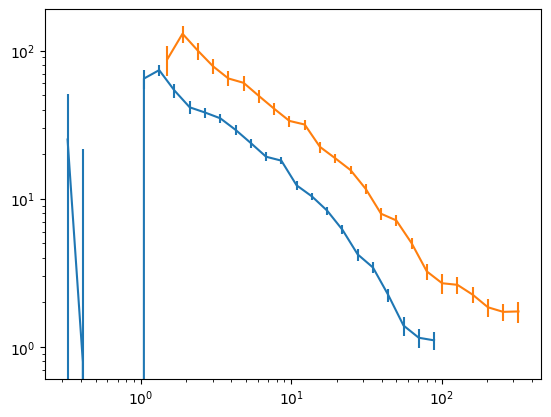

In [66]:
plt.errorbar(rp_auto, signal_auto, err_auto)
plt.errorbar(count['rpm'], count['wrp'], count['wrperr'])
plt.loglog()